# Homework 2

### Import Dataset

In [41]:
from __future__ import division, print_function, unicode_literals
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

data = pd.read_table('http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data',sep=',',header=None)
print(data.head(5))

         0  1      2      3       4       5        6        7       8   \
0    842302  M  17.99  10.38  122.80  1001.0  0.11840  0.27760  0.3001   
1    842517  M  20.57  17.77  132.90  1326.0  0.08474  0.07864  0.0869   
2  84300903  M  19.69  21.25  130.00  1203.0  0.10960  0.15990  0.1974   
3  84348301  M  11.42  20.38   77.58   386.1  0.14250  0.28390  0.2414   
4  84358402  M  20.29  14.34  135.10  1297.0  0.10030  0.13280  0.1980   

        9   ...     22     23      24      25      26      27      28      29  \
0  0.14710  ...  25.38  17.33  184.60  2019.0  0.1622  0.6656  0.7119  0.2654   
1  0.07017  ...  24.99  23.41  158.80  1956.0  0.1238  0.1866  0.2416  0.1860   
2  0.12790  ...  23.57  25.53  152.50  1709.0  0.1444  0.4245  0.4504  0.2430   
3  0.10520  ...  14.91  26.50   98.87   567.7  0.2098  0.8663  0.6869  0.2575   
4  0.10430  ...  22.54  16.67  152.20  1575.0  0.1374  0.2050  0.4000  0.1625   

       30       31  
0  0.4601  0.11890  
1  0.2750  0.08902  
2  0.

In [13]:
col = ["ID","diagnosis"]
cc = ["Radius","Texture","Perimeter","Area","Smoothness","Compactness","Concavity","Concave_Points","Symmetry","Fractal_Dimension"]
for m in range(10):
    col.append("Mean_" + cc[m])
for s in range(10):
    col.append(cc[s] + "_SE")
for w in range(10):
    col.append("Worst_" + cc[w])   
data.columns = col
data.loc[data.diagnosis == "M","diagnosis"] = 1
data.loc[data.diagnosis == "B","diagnosis"] = 0
print(data.head(5))

         ID  diagnosis  Mean_Radius  Mean_Texture  Mean_Perimeter  Mean_Area  \
0    842302          1        17.99         10.38          122.80     1001.0   
1    842517          1        20.57         17.77          132.90     1326.0   
2  84300903          1        19.69         21.25          130.00     1203.0   
3  84348301          1        11.42         20.38           77.58      386.1   
4  84358402          1        20.29         14.34          135.10     1297.0   

   Mean_Smoothness  Mean_Compactness  Mean_Concavity  Mean_Concave_Points  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  Worst_Radius  Worst_Texture  Worst_Perimeter  Wo

### Descriptive Statistics

In [14]:
data.describe()

ID   diagnosis  Mean_Radius  Mean_Texture  Mean_Perimeter  \
count  5.690000e+02  569.000000   569.000000    569.000000      569.000000   
mean   3.037183e+07    0.372583    14.127292     19.289649       91.969033   
std    1.250206e+08    0.483918     3.524049      4.301036       24.298981   
min    8.670000e+03    0.000000     6.981000      9.710000       43.790000   
25%    8.692180e+05    0.000000    11.700000     16.170000       75.170000   
50%    9.060240e+05    0.000000    13.370000     18.840000       86.240000   
75%    8.813129e+06    1.000000    15.780000     21.800000      104.100000   
max    9.113205e+08    1.000000    28.110000     39.280000      188.500000   

         Mean_Area  Mean_Smoothness  Mean_Compactness  Mean_Concavity  \
count   569.000000       569.000000        569.000000      569.000000   
mean    654.889104         0.096360          0.104341        0.088799   
std     351.914129         0.014064          0.052813        0.079720   
min     143.500000         0.052630          0.019380        0.000000   
25%     420.300000         0.086370          0.064920        0.029560   
50%     551.100000         0.095870          0.092630        0.061540   
75%     782.700000         0.105300          0.130400        0.130700   
max    2501.000000         0.163400          0.345400        0.426800   

       Mean_Concave_Points  ...  Worst_Radius  Worst_Texture  Worst_Perimeter  \
count           569.000000  ...    569.000000     569.000000       569.000000   
mean              0.048919  ...     16.269190      25.677223       107.261213   
std               0.038803  ...      4.833242       6.146258        33.602542   
min               0.000000  ...      7.930000      12.020000        50.410000   
25%               0.020310  ...     13.010000      21.080000        84.110000   
50%               0.033500  ...     14.970000      25.410000        97.660000   
75%               0.074000  ...     18.790000      29.720000       125.400000   
max               0.201200  ...     36.040000      49.540000       251.200000   

        Worst_Area  Worst_Smoothness  Worst_Compactness  Worst_Concavity  \
count   569.000000        569.000000         569.000000       569.000000   
mean    880.583128          0.132369           0.254265         0.272188   
std     569.356993          0.022832           0.157336         0.208624   
min     185.200000          0.071170           0.027290         0.000000   
25%     515.300000          0.116600           0.147200         0.114500   
50%     686.500000          0.131300           0.211900         0.226700   
75%    1084.000000          0.146000           0.339100         0.382900   
max    4254.000000          0.222600           1.058000         1.252000   

       Worst_Concave_Points  Worst_Symmetry  Worst_Fractal_Dimension  
count            569.000000      569.000000               569.000000  
mean               0.114606        0.290076                 0.083946  
std                0.065732        0.061867                 0.018061  
min                0.000000        0.156500                 0.055040  
25%                0.064930        0.250400                 0.071460  
50%                0.099930        0.282200                 0.080040  
75%                0.161400        0.317900                 0.092080  
max                0.291000        0.663800                 0.207500  

[8 rows x 32 columns]

In [5]:
data.isnull().sum().sum()

0

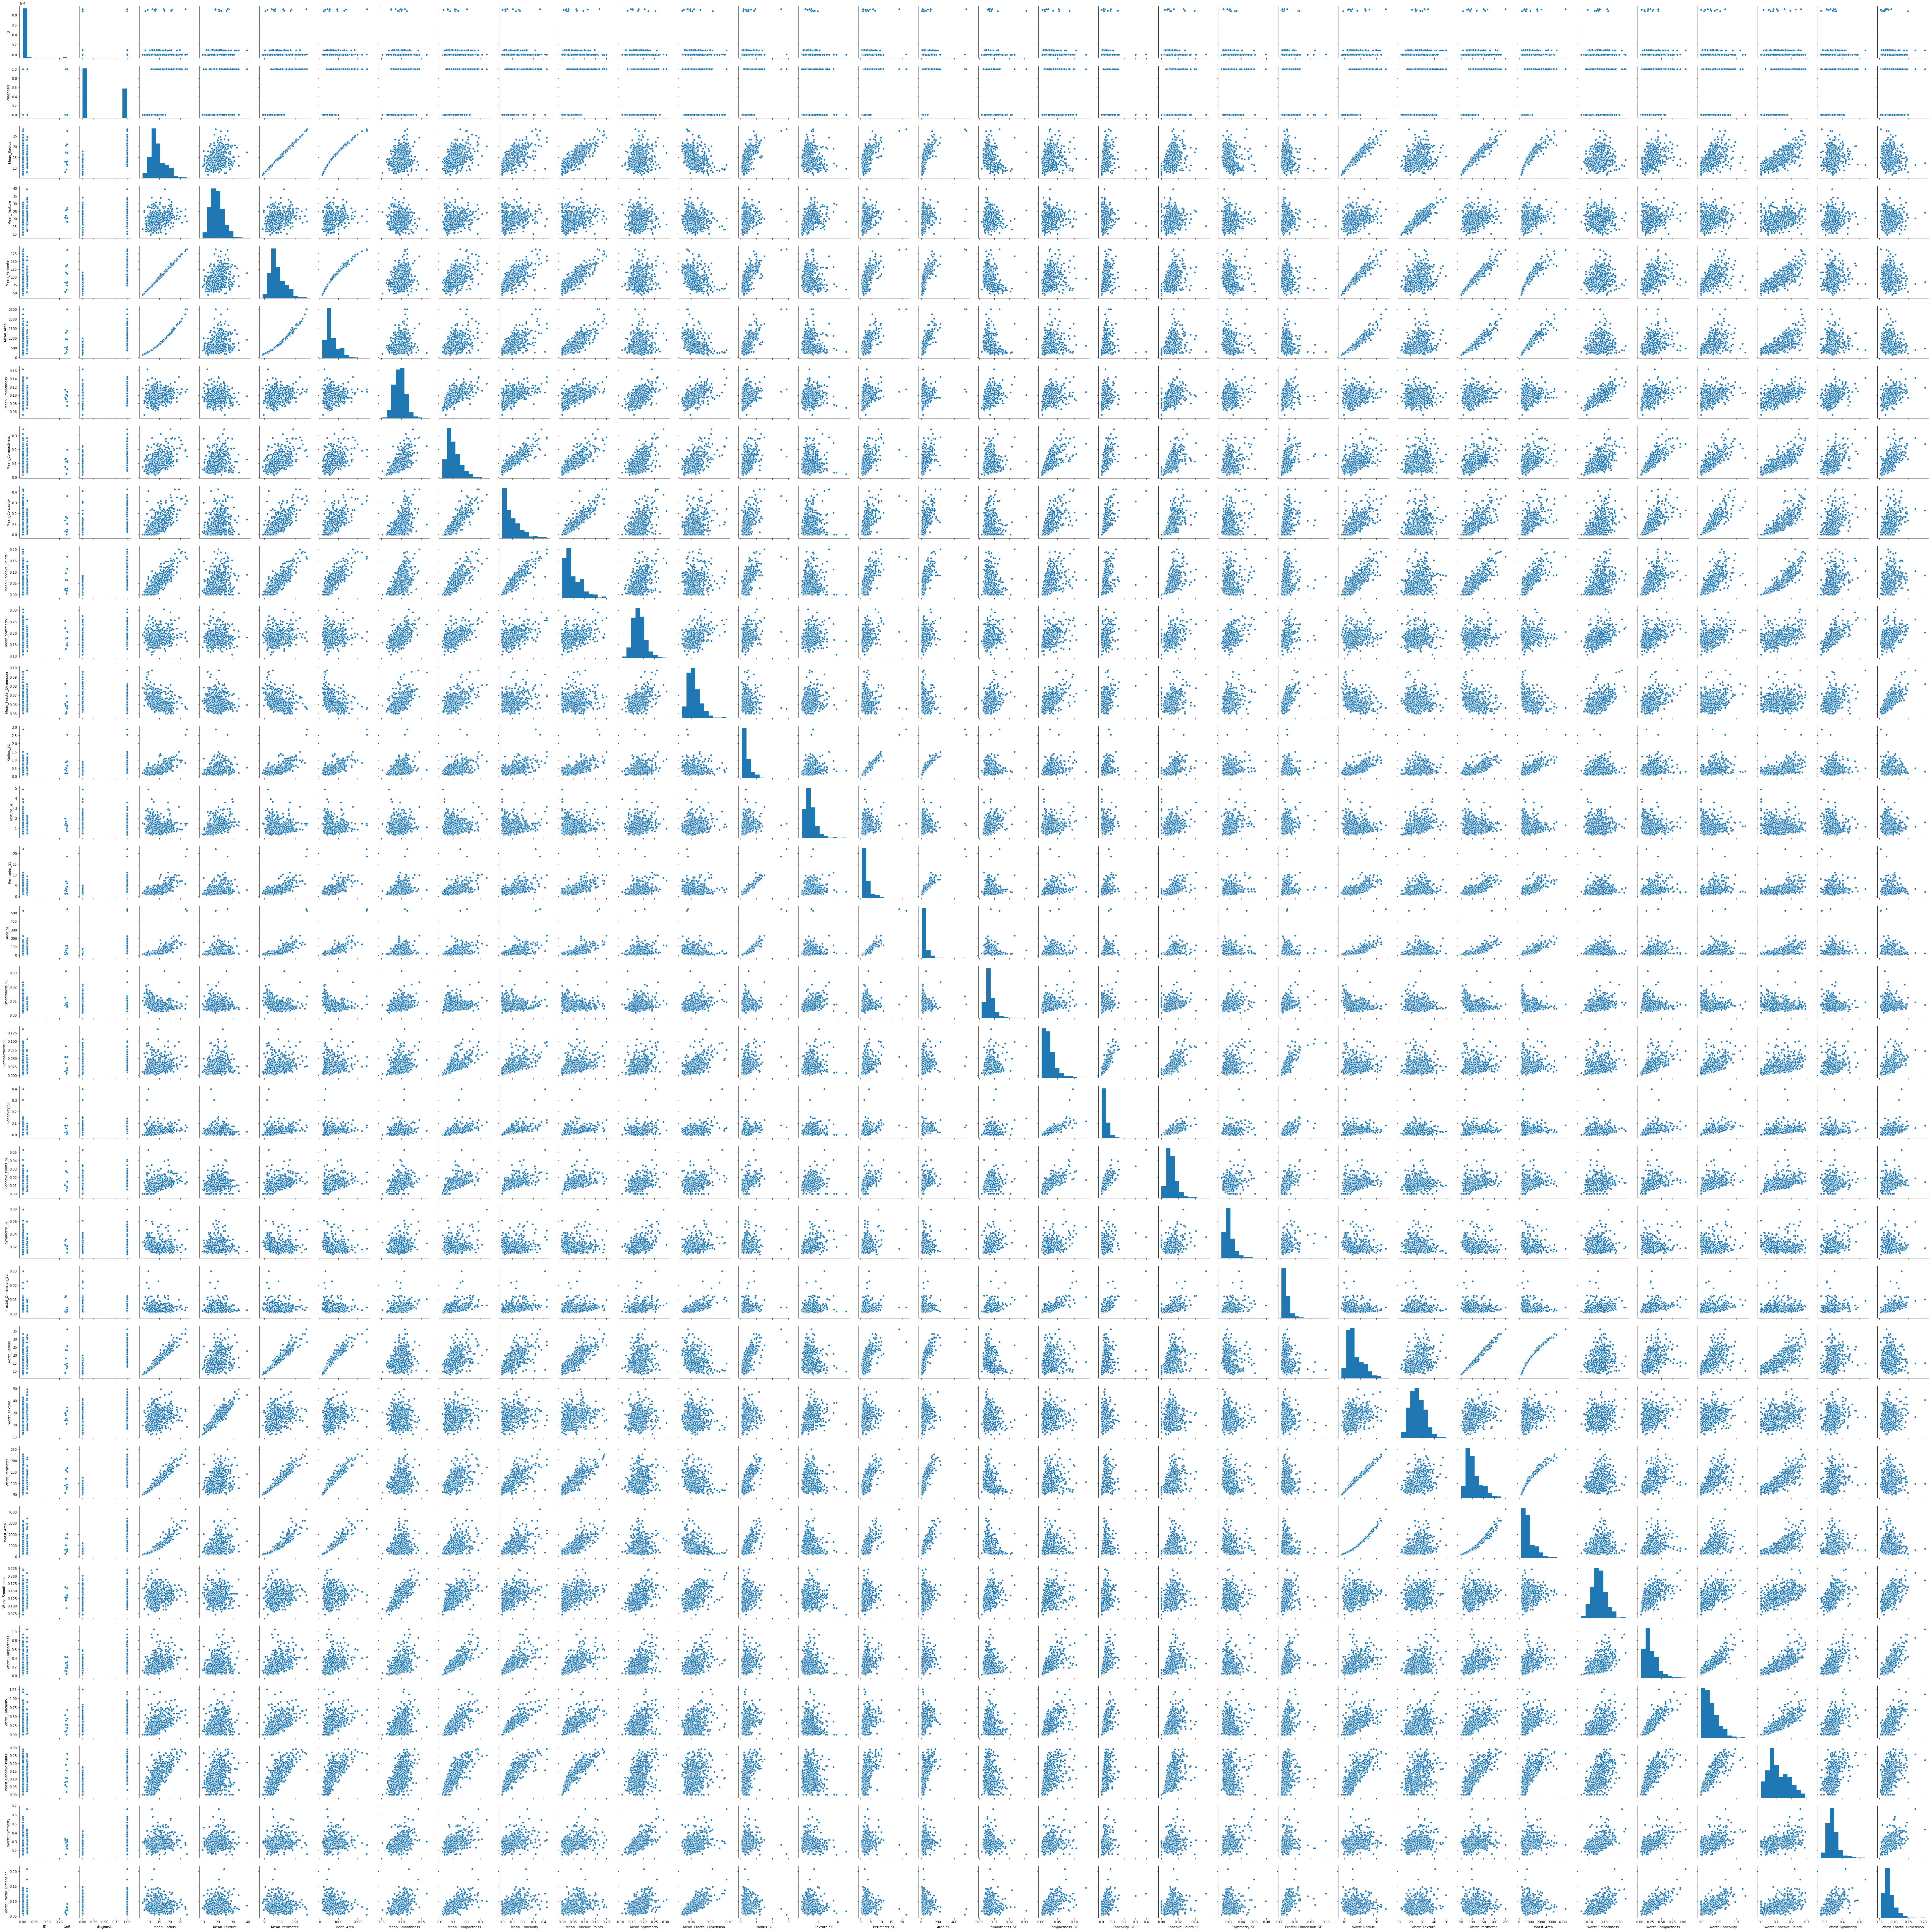

In [85]:
sns.pairplot(data)

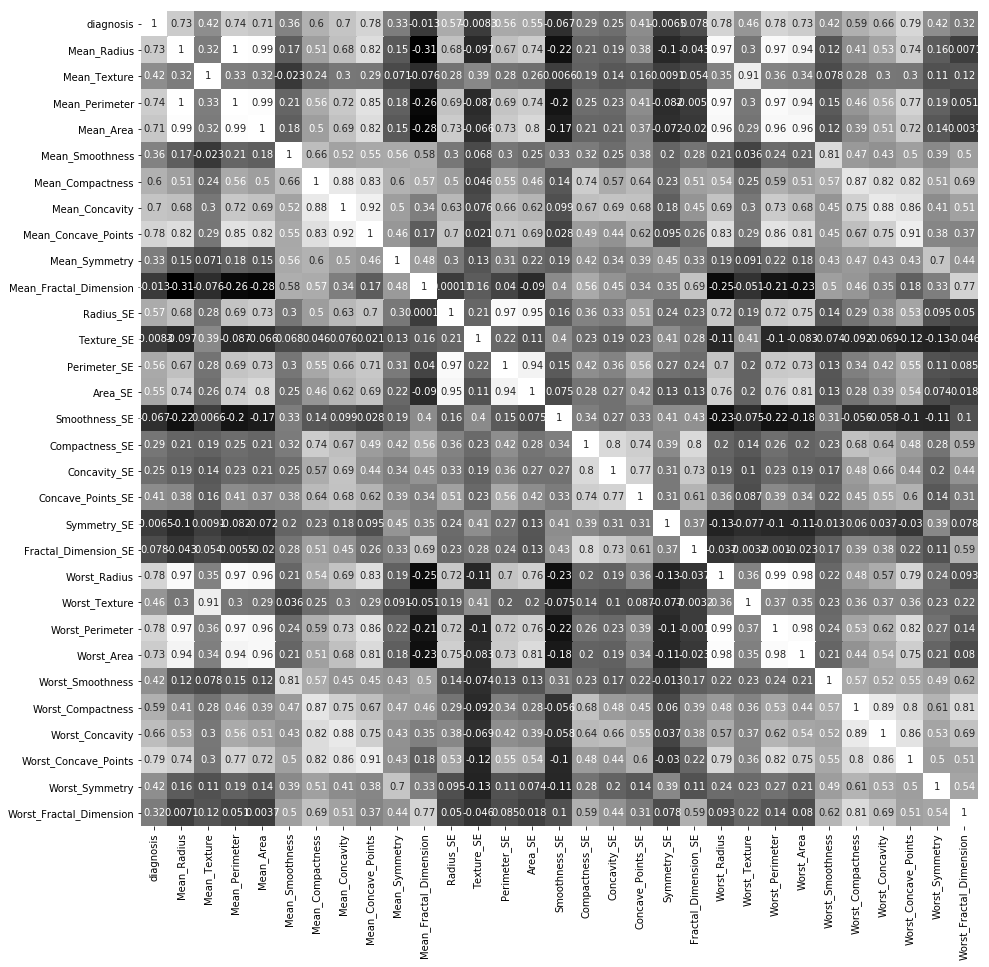

In [15]:
corrmatrix = data.corr()
top_correlated_features = corrmatrix.index
plt.figure(figsize=(15,15))
plot = sns.heatmap(data[top_correlated_features[1:]].corr(),annot=True,cmap="gray",cbar=0)

### $K$-Nearest Neighbors

In [16]:
X = data.values[:, 2:]
y = data.values[:, 1]

In [17]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

In [19]:
print('Labels counts in y:', np.bincount(y.astype('int64')))
print('Labels counts in y_train:', np.bincount(y_train.astype('int64')))
print('Labels counts in y_test:', np.bincount(y_test.astype('int64')))

Labels counts in y: [357 212]
Labels counts in y_train: [250 148]
Labels counts in y_test: [107  64]


In [20]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [21]:
from sklearn import neighbors, datasets

knn = neighbors.KNeighborsClassifier(n_neighbors=3, 
                           p=2, 
                           metric='minkowski') #The default metric is minkowski, which is a generalization of the Euclidean distance
                                               # with p=2 is equivalent to the standard Euclidean distance.
knn = knn.fit(X_train_std, y_train)            # with p=1 is equivalent to the Mahattan distance.

from sklearn.metrics import accuracy_score, f1_score, cohen_kappa_score, classification_report

# Estimate the predicted values by applying the kNN algorithm
y_pred = knn.predict(X_test_std)
y_pred_insample = knn.predict(X_train_std)

# Accuracy
print('Accuracy (out-of-sample): %.4f' % accuracy_score(y_test, y_pred))
print('Accuracy (in-sample): %.4f' % accuracy_score(y_train, y_pred_insample))

# F1 score
print('F1 score (out-of-sample): ', f1_score(y_test, y_pred, average='macro'))
print('F1 score (in-sample)    : ', f1_score(y_train, y_pred_insample, average='macro'))

# Kappa score
print('Kappa score (out-of-sample): ', cohen_kappa_score(y_test, y_pred))
print('Kappa score (in-sample)    : ', cohen_kappa_score(y_train, y_pred_insample))

# Build a text report showing the main classification metrics (out-of-sample performance)
print(classification_report(y_test, y_pred, target_names=['benign','malignant']))

Accuracy (out-of-sample): 0.9591
Accuracy (in-sample): 0.9874
F1 score (out-of-sample):  0.9555629802873371
F1 score (in-sample)    :  0.9864973978653675
Kappa score (out-of-sample):  0.9112083673318003
Kappa score (in-sample)    :  0.9729964447580536
              precision    recall  f1-score   support

      benign       0.95      0.99      0.97       107
   malignant       0.98      0.91      0.94        64

   micro avg       0.96      0.96      0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



### Logistic Regression

In [39]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report
import warnings
warnings.filterwarnings("ignore")

############################################    Split the Data   ############################################

# Split validation
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

#################################### Train the Logistic Regression Model ####################################

# We create an instance of the Classifier
# Logistic Regression (aka logit) classifier.
a = []
for i in range(50):
    clf = linear_model.LogisticRegression(C=10**i)
    clf = clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)
    y_pred_insample = clf.predict(X_train)
    a.append(accuracy_score(y_test, y_pred))

0.9766081871345029
(array([21, 31, 38], dtype=int64),)


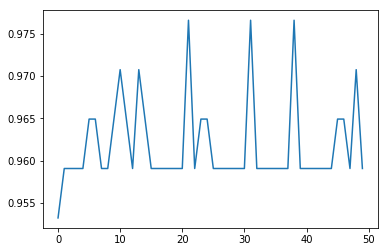

In [40]:
plt.plot(a)
print(np.max(a))
print(np.where(a == np.max(a)))

In [33]:
clf = linear_model.LogisticRegression(C=10**21)
clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_pred_insample = clf.predict(X_train)
print('Accuracy (out-of-sample): %.4f' % accuracy_score(y_test, y_pred))
print('Accuracy (in-sample): %.4f' % accuracy_score(y_train, y_pred_insample))

y_pred = clf.predict(X_test)            
y_pred_prob = clf.predict_proba(X_test)  
print(y_pred[0], y_pred_prob[0], np.sum(y_pred_prob[0]))
print(classification_report(y_test, y_pred, target_names=['benign','malignant']))

Accuracy (out-of-sample): 0.9766
Accuracy (in-sample): 0.9950
0.0 [9.99981366e-01 1.86337676e-05] 1.0
              precision    recall  f1-score   support

      benign       0.97      0.99      0.98       107
   malignant       0.98      0.95      0.97        64

   micro avg       0.98      0.98      0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



### Cross Validation

In [34]:
from sklearn import metrics 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Fit model to all the data
clf_lr = linear_model.LogisticRegression(C=10**21)

# Evaluate performance with cross-validation
# Read more about cross_val_score in the following link 
# http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score

# Accuracy
scores=cross_val_score(clf_lr, X, y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print(scores)

# F-1 scores
scores_f1=cross_val_score(clf_lr, X, y, cv=5, scoring='f1_macro')
print("F1-score: %0.2f (+/- %0.2f)" % (scores_f1.mean(), scores_f1.std() * 2))# returns an array of scores of the estimator for each run of the cross validation.
print(scores_f1)

Accuracy: 0.95 (+/- 0.02)
[0.94782609 0.93913043 0.96460177 0.94690265 0.96460177]
F1-score: 0.95 (+/- 0.02)
[0.94428295 0.9340218  0.96172087 0.94368771 0.96245847]


In [35]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    # Visualization patamters
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    # Estimate train and test score for different training set sizes
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes) # learning_curve Determines cross-validated 
                                                                        # training and test scores for different 
                                                                        # training set sizes.

    # Estimate statistics of train and test scores (mean, std)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    # Fill the area around the mean scores with standard deviation info
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r") # Fill for train set scores

    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")  # Fill for test set scores
    
    # Visualization parameters that will allow us to distinguish train set scores from test set scores
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

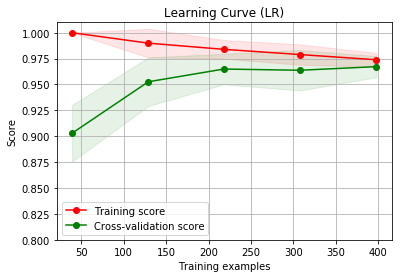

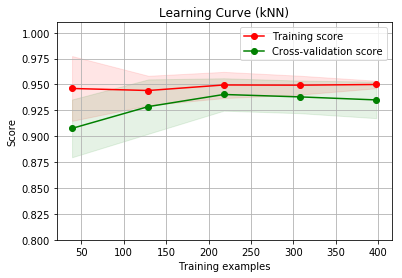

In [37]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn import neighbors

title = "Learning Curve (LR)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=42)
estimator = LogisticRegression(C=1e21)
plot_learning_curve(estimator, title, X, y, (0.8, 1.01), cv=cv, n_jobs=4)

plt.show()

title = "Learning Curve (kNN)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=42)
estimator = neighbors.KNeighborsClassifier(n_neighbors=3) #n_neighbors=
plot_learning_curve(estimator, title, X, y, (0.8, 1.01), cv=cv, n_jobs=4)

plt.show()